In [6]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
import math
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2
lumi = 137000 #in pb-1

# donotdelete = []
print(sys.version)

3.6.8 (default, Apr 25 2019, 21:02:35) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-36)]


In [ ]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
# tree_sig = OrderedDict()
# fpath_sig =OrderedDict()
path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p6/MC_Summer16/v1/'
bkg_path = path+"/bkg/wH/normalized/"
# greater than one lepton, lepton 27 GeV cut, greater than 2 jets
lumi = 137000 #in pb-1

fpath_bkg['bkg_QCD'] = bkg_path+"QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['bkg_DYJetsToLL'] = bkg_path+"DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
fpath_bkg['bkg_TTJets_DiLept'] = bkg_path+"TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['bkg_TTJets_SingleLeptFromTbar'] = bkg_path+"TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['bkg_TTJets_SingleLeptFromT'] = bkg_path+"TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['bkg_WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
fpath_bkg['bkg_ZJetsToNuNu'] = bkg_path+"ZJetsToNuNu_Zpt-100toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"

# for k,v in fpath_bkg.items():
#     print (k, v)
# #     tree[k] = rtnp.root2array(v)
#     root_dir = uproot.open(v) 
#     tree_bkg[k] = root_dir['vH']
# #     tree[k] = root_dir['ntuples']
#     a = tree_bkg[k]["weight"].array()
#     print (np.unique(a))
#     print(a.shape)

In [3]:
if wH:
    sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p6/MC_Summer16/v1/signals/wH/normalized/'
else:    
    sig_path = path+'/signals/zH/normalized/'

fpath_bkg['bbbb'] = sig_path + 'WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-1000_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root'
# fpath_sig['met+bb'] = sig_path + 'ppTohToSS1SS2_SS1Tobb_SS2Toveve_vh_withISR_mh125_mx50_pl1000_ev100000_1pb_weighted.root'



for k,v in fpath_bkg.items():
    print (k)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['vH']
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["weight"].array()
    print (np.unique(a)*lumi)
    print(a.shape)
    

bkg_QCD
[5.74442463e-01 1.38743174e+00 1.08710577e+01 2.20760235e+01
 7.28020832e+01 8.80435115e+02 4.10974115e+03 8.14698044e+06]
(308355,)
bkg_DYJetsToLL
[6.52322632]
(20920610,)
bkg_TTJets_DiLept
[0.38821147]
(18574089,)
bkg_TTJets_SingleLeptFromTbar
[0.42726605]
(22310210,)
bkg_TTJets_SingleLeptFromT
[0.48729095]
(19575387,)
bkg_WJetsToLNu
[32.23907671]
(20535504,)
bkg_ZJetsToNuNu
[0.29660909 0.49362621]
(7968,)
bbbb
[0.94611056 1.4916158 ]
(11330,)


In [2]:
legend = {}
# legend['bbbb'] = 'Signal (m_{h} ,m_{x})=(125, 50) GeV, c#tau = 1 m'
legend['bbbb'] = 'Signal (m_{h} ,m_{x})=(125, 50) GeV, c#tau = 1 m'


legend['bbbb_mh2000_ctau1'] = 'Signal (m_{h} ,m_{x})=(2000, 975) GeV, c#tau = 1 m'
legend['bbbb_mh125_ctau10'] = 'Signal (m_{h} ,m_{x})=(125, 50) GeV, c#tau = 10 m'
legend['bbbb_mh2000_ctau10'] = 'Signal (m_{h} ,m_{x})=(2000, 975) GeV, c#tau = 10 m'
legend['bkg_QCD'] = 'QCD'
legend['bkg_DYJetsToLL'] = 'DYJetsToLL'
legend['bkg_TTJets_DiLept'] = 'TTJets_DiLept'
legend['bkg_TTJets_SingleLeptFromTbar'] = 'TTJets_SingleLeptFromTbar'
legend['bkg_TTJets_SingleLeptFromT'] = 'TTJets_SingleLeptFromT'
legend['bkg_WJetsToLNu'] = 'WJetsToLNu'
legend['bkg_ZJetsToNuNu'] = 'ZJetsToNuNu'





trigger_names_file = '/nfshome/christiw/llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
if wH:
    trigger_paths = [87,135] #PFMET120
else:
    trigger_paths = [177,362,87,135] #PFMET120

# 177 HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ
# 362 HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ
# 310 HLT_PFMET120_PFMHT120_IDTight
# 87 HLT_Ele32_WPTight_Gsf
# 135 HLT_IsoMu24
# 310 PFMET


In [7]:
met_cut = 30 #GeV
jetTime_cut = 1 #ns
lepid = 13 #muon


jetPt = {}
jetEta = {}
jetPhi = {}
jetTime = {}
jet_ecal_energy = {}
lepPt = {}
lepEta = {}
lepPhi = {}
start_t = time.time()
jetGammaMax = {}
jetMinDeltaRPVTracks = {}
jetchef = {}
met = {}
runNum = {}
lumiSec = {}
evtNum = {}
sig_et = {}
mass = {} #mt if wH, Mz if zH
weight = {}
start_t = time.time()

for k in tree_bkg.keys():
    if True:
        T = tree_bkg[k]
        
        #choose only muon or ele
        lepPt[k] = T.array('lepPt')[np.abs(T.array('lepPdgId')) == lepid]
        
        #jet selection
        jet_sel = np.abs(T.array('jetEta'))<1.48
        jet_sel = np.logical_and(jet_sel,T.array('ecalNRechits')>5)
        
        jetEta[k] =T.array('jetEta')[jet_sel]
        jetPt[k] = T.array('jetPt')[jet_sel]
        jetTime[k] =T.array('jetTime')[jet_sel]
        jetGammaMax[k] = T.array('jetGammaMax_ET')[jet_sel]
        jetMinDeltaRPVTracks[k] = T.array('jetMinDeltaRPVTracks')[jet_sel]
        jetchef[k] = T.array('jetChargedHadronEnergyFraction')[jet_sel]
        sig_et[k] = np.sqrt(T.array('jet_sig_et1')[jet_sel]**2+ T.array('jet_sig_et2')[jet_sel]**2)
        jet_ecal_energy[k] = T.array('ecalRechitE')[jet_sel]
        # event level selection
        print(time.time()-start_t)

        hlt = T['HLTDecision'].array()
        # select only triggered events
        sel_ev= np.zeros(hlt[:,0].shape)
        for tr in trigger_paths:
            sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
        sel_ev = np.logical_and(sel_ev,lepPt[k].counts == 1)
        sel_ev = np.logical_and(sel_ev,jetPt[k].counts >= 1)

#         if wH: #additional wH cuts
# #             sel_ev[k] = np.logical_and(sel_ev[k],lep1Pt_temp > 27) # cut on leading lepton pT for muon
# #             sel_ev[k] = np.logical_and(sel_ev[k], nLeptons_temp == 1 ) # request only 1 lepton
            
#         else:  #not completed
#             sel_ev[k] = np.logical_and(sel_ev[k], nLeptons_temp == 2) 
#             sel_ev[k] = np.logical_and(sel_ev[k], abs(mass_temp-Z_MASS) < 30) 
#             sel_ev[k] = np.logical_and(sel_ev[k],lep1Pt_temp > 25) # cut on leading lepton pT for muon
#         sel_ev[k] = np.logical_and(sel_ev[k],weight_temp < 800000) # git rid of weights > 1
#         sel_ev[k] = np.logical_and(sel_ev[k], abs(lepPdgId) == 13 ) # request only muon
#         sel_ev[k] = np.logical_and(sel_ev[k], nJets == 2) # request dijet
#         sel_ev[k] = np.logical_and(sel_ev[k],met_temp > met_cut) # add met cut
#         sel_ev[k] = np.logical_and(sel_ev[k], (jetTime_temp > jetTime_cut).any()) # add jet Time cut
        if wH:
            mass_temp = T.array('MT')
        else:
            mass_temp = T.array('ZMass')

        met[k] = T.array('met')[sel_ev]
        weight[k] =  T.array('weight')[sel_ev] * lumi
        mass[k] = mass_temp[sel_ev]
        runNum[k] = T.array('runNum')[sel_ev]
        lumiSec[k] = T.array('lumiSec')[sel_ev]
        evtNum[k] = T.array('evtNum')[sel_ev]
        
        lepPt[k] = lepPt[k][sel_ev]
        jetEta[k] =jetEta[k][sel_ev]
        jetPt[k] = jetPt[k][sel_ev]
        jetTime[k] =jetTime[k][sel_ev]
        jetGammaMax[k] = jetGammaMax[k][sel_ev]
        jetMinDeltaRPVTracks[k] = jetMinDeltaRPVTracks[k][sel_ev]
        jetchef[k] = jetchef[k][sel_ev]
        sig_et[k] = sig_et[k][sel_ev]
        jet_ecal_energy[k] = jet_ecal_energy[k][sel_ev]
        
        


#         print(k+" only wh selection",sum(weight_temp[sel_ev[k]] * lumi))
#         sel_ev[k] = np.logical_and(sel_ev[k],met_temp > met_cut) # add met cut
#         print(k+" + 30 GeV met cut",sum(weight_temp[sel_ev[k]] * lumi))
#         sel_ev[k] = np.logical_and(sel_ev[k], jetTime_temp > jetTime_cut) # add jet Time cut
#         print(k+" + 1ns jetTime cut",sum(weight_temp[sel_ev[k]] * lumi))

        print(k,len(met[k]),sum(weight[k]),(time.time()-start_t))
        print(weight[k][0])
        start_t = time.time()
    else:
        print(k)

8.146337032318115
bkg_QCD 10397 23577980.193554647 13.338674306869507
10.87105769693153
96.13929986953735
bkg_DYJetsToLL 3201861 20886463.955123633 153.7258951663971
6.523226322315168
107.67631578445435
bkg_TTJets_DiLept 8146526 3162574.8128873673 217.8990981578827
0.3882114674524928
207.65503025054932
bkg_TTJets_SingleLeptFromTbar 10313945 4406798.579549547 547.0563497543335
0.4272660537480988
293.98086881637573
bkg_TTJets_SingleLeptFromT 9032393 4401403.36937727 375.08256101608276
0.48729095033195335
108.07043600082397
bkg_WJetsToLNu 6194073 199691194.57113707 208.10473918914795
32.23907671053894
0.1986527442932129
bkg_ZJetsToNuNu 188 83.14788921688887 1.1302530765533447
0.4936262143928616
0.12643647193908691
bbbb 4258 5149.0065376438 0.2095470428466797
1.491615803388413


In [10]:
# import pickle
# store_variables = [evtNum,lumiSec,runNum,weight,sig_et,jet_ecal_energy,mass,met,lepPt,jetPt,jetTime,jetGammaMax,jetMinDeltaRPVTracks,jetchef]
# start = time.time()

# # # Getting back the objects:
# with open('optimization_noecalcut.pkl','wb') as f:  # Python 3: open(..., 'rb')
#     pickle.dump(store_variables, f)
# print('time used: '+ str(time.time()-start))


time used: 535.8733925819397


In [14]:
# ## prepare the pickles with ecal cut
# start_t = time.time()
# for k,v in evtNum.items():
#     cond = jet_ecal_energy[k]>15
#     jetPt[k] = jetPt[k][cond]
#     sig_et[k] = sig_et[k][cond]
#     jetTime[k] = jetTime[k][cond]
#     jetGammaMax[k] = jetGammaMax[k][cond]
#     jetMinDeltaRPVTracks[k] = jetMinDeltaRPVTracks[k][cond]
#     jetchef[k] = jetchef[k][cond]
#     jet_ecal_energy[k] = jet_ecal_energy[k][cond]
# for k,v in evtNum.items():
#     cond = jetPt[k].count()>=1 #at least one jet per event
#     evtNum[k] = evtNum[k][cond]
#     lumiSec[k] = lumiSec[k][cond]
#     runNum[k] = runNum[k][cond]
#     weight[k] = weight[k][cond]
#     sig_et[k] = sig_et[k][cond]
#     jet_ecal_energy[k] = jet_ecal_energy[k][cond]
#     mass[k] = mass[k][cond]
#     met[k] = met[k][cond]
#     lepPt[k] = lepPt[k][cond]
#     jetPt[k] = jetPt[k][cond]
#     jetTime[k] = jetTime[k][cond]
#     jetGammaMax[k] = jetGammaMax[k][cond]
#     jetMinDeltaRPVTracks[k] = jetMinDeltaRPVTracks[k][cond]
#     jetchef[k] = jetchef[k][cond]
#     print(len(weight[k]),len(jet_ecal_energy[k]))

# store_variables = [evtNum,lumiSec,runNum,weight,sig_et,jet_ecal_energy,mass,met,lepPt,jetPt,jetTime,jetGammaMax,jetMinDeltaRPVTracks,jetchef]


# with open('optimization_ecalcut15.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump(store_variables, f)
# print(time.time()-start_t)

9747 9747
2182365 2182365
7101502 7101502
9440976 9440976
8265875 8265875
4017045 4017045
151 151
3203 3203
155.56344366073608


In [7]:
import pickle
start_t = time.time()
with open('optimization_noecalcut.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    evtNum,lumiSec,runNum,weight,sig_et,jet_ecal_energy,mass,met,lepPt,jetPt,jetTime,jetGammaMax,jetMinDeltaRPVTracks,jetchef= pickle.load(f)
print(time.time()-start_t)

19.1116623878479


In [4]:
# optimization 
# mindeltaR_cuts =[0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15]
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

br = 0.2
sig_bins = [0,1,2]

space  = [Real(0,5, name='time'),
          Real(0.0,1.5, name='tmf'),
          Real(0.0,1.5,name='jetMinDeltaRPVTracks'),
          Real(0.0,4.0,name = 'sig_et')
          ]
def figure_of_merit(time_cut = -50,gamma_cut = 50,minDeltaR_cut = -50,sig_cut = -50):
    nTags = {}
    sig_count = [] 
    bkg_count = np.zeros((3,))
    for k,T in jetGammaMax.items():
        start_t = time.time()

        tagged_jet = np.logical_and(jetGammaMax[k]<gamma_cut,jetMinDeltaRPVTracks[k]>minDeltaR_cut)
        tagged_jet = np.logical_and(tagged_jet,jetTime[k]>time_cut)
        tagged_jet = np.logical_and(tagged_jet,sig_et[k]<sig_cut)
#         tagged_jet = np.logical_and(tagged_jet,np.abs(jetEta[k])<1.48)
        nTags[k] = jetPt[k][tagged_jet].count() #event level variable, number of tags jet per event, no weights added
#         nTags[k] = np.sum(w[tagged_jet])
#         nJets[k] = np.sum(w[w<8000000])
            
        occurCount = []
        for i in sig_bins:
            if i == 2:
                occurCount.append(np.sum(weight[k][nTags[k] >= i])) #overflow bin
            else:
                occurCount.append(np.sum(weight[k][nTags[k] == i]))
        occurCount = np.array(occurCount)
        if k[:4] == 'bbbb':
            sig_count = list(occurCount[:2])
            sig_count.append(sum(occurCount[2:]))
            sig_count = np.array(sig_count)
        else:
            bkg_count = bkg_count + occurCount

#     cond = np.logical_not(np.logical_or(sig_count < 5,bkg_count < 5))
    sig_count = sig_count*br
    bkg_count = bkg_count
    print("sig count", sig_count)
    print("bkg count", bkg_count)
    cond = sig_count > 5
    if not np.count_nonzero(cond) == len(sig_bins):
        return 1

#     return -1.0*np.sum(2*((s+b)*math.log(s/b+1)-s))**0.5
    return -1.0 * np.sum(sig_count**2/(sig_count+bkg_count))**0.5

@use_named_args(space)
def objective(**X):
    print("New configuration: {}".format(X))
    begt = time.time()
    fom = figure_of_merit(time_cut=X['time'], gamma_cut=X['tmf'],minDeltaR_cut=X['jetMinDeltaRPVTracks'],sig_cut = X['sig_et'])
#     fom = train(model, learning_rate=X['learning_rate'])
    return fom


res_gp = gp_minimize(objective, space, n_calls=500, n_random_starts=100, random_state=123, verbose=True)

/usr/local/lib64/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Iteration No: 1 started. Evaluating function at random point.
New configuration: {'time': 3.5647766026161367, 'tmf': 0.6427063892802387, 'jetMinDeltaRPVTracks': 1.0363272825402927, 'sig_et': 2.8766012406190926}
sig count [1029.80130753    0.            0.        ]
bkg count [2.56126499e+08 0.00000000e+00 0.00000000e+00]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 47.3301
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 2 started. Evaluating function at random point.
New configuration: {'time': 2.4555946671629867, 'tmf': 1.170041642868119, 'jetMinDeltaRPVTracks': 0.6163865590635286, 'sig_et': 2.318777188090441}
sig count [1026.90501588    2.89629165    0.        ]
bkg count [2.56126308e+08 1.90510461e+02 0.00000000e+00]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 44.9486
Function value obtained: 1.0000
Current minimum: 1.0000
Iteration No: 3 started. Evaluating function at random point.
New configuration: {'time': 0.69

sig count [1029.80130753    0.            0.        ]
bkg count [2.56126499e+08 0.00000000e+00 0.00000000e+00]
Iteration No: 19 ended. Evaluation done at random point.
Time taken: 41.8233
Function value obtained: 1.0000
Current minimum: -0.1679
Iteration No: 20 started. Evaluating function at random point.
New configuration: {'time': 2.536021588703977, 'tmf': 0.42118979789022937, 'jetMinDeltaRPVTracks': 1.1457550417132252, 'sig_et': 0.4341691827406412}
sig count [1.02893532e+03 8.65989498e-01 0.00000000e+00]
bkg count [2.56126489e+08 9.53505901e+00 0.00000000e+00]
Iteration No: 20 ended. Evaluation done at random point.
Time taken: 42.2129
Function value obtained: 1.0000
Current minimum: -0.1679
Iteration No: 21 started. Evaluating function at random point.
New configuration: {'time': 2.5582735870767497, 'tmf': 1.3646540964512148, 'jetMinDeltaRPVTracks': 0.32756402033139664, 'sig_et': 1.4524162687400726}
sig count [1027.69088431    2.11042322    0.        ]
bkg count [2.56124849e+08 1.

sig count [1015.93183779   13.86946974    0.        ]
bkg count [2.56124791e+08 1.70764638e+03 0.00000000e+00]
Iteration No: 38 ended. Evaluation done at random point.
Time taken: 42.4460
Function value obtained: 1.0000
Current minimum: -0.2721
Iteration No: 39 started. Evaluating function at random point.
New configuration: {'time': 3.4309342990245577, 'tmf': 1.4889204390189963, 'jetMinDeltaRPVTracks': 0.6077777681282779, 'sig_et': 0.7606948812267913}
sig count [1.02950298e+03 2.98323161e-01 0.00000000e+00]
bkg count [2.56126497e+08 2.13921630e+00 0.00000000e+00]
Iteration No: 39 ended. Evaluation done at random point.
Time taken: 41.9985
Function value obtained: 1.0000
Current minimum: -0.2721
Iteration No: 40 started. Evaluating function at random point.
New configuration: {'time': 2.4408724489754734, 'tmf': 0.7535544711684206, 'jetMinDeltaRPVTracks': 0.6050322291291641, 'sig_et': 0.7243816983167642}
sig count [1026.90501588    2.89629165    0.        ]
bkg count [2.56126300e+08 1.9

sig count [867.89025029 155.54398871   6.36706853]
bkg count [2.55231128e+08 8.94519576e+05 8.51171573e+02]
Iteration No: 56 ended. Evaluation done at random point.
Time taken: 43.1417
Function value obtained: -0.2780
Current minimum: -0.2780
Iteration No: 57 started. Evaluating function at random point.
New configuration: {'time': 2.649126056257499, 'tmf': 0.9378363988956742, 'jetMinDeltaRPVTracks': 0.472714534054134, 'sig_et': 1.9660425577661083}
sig count [1028.74609592    1.05521161    0.        ]
bkg count [2.56126346e+08 1.52961991e+02 0.00000000e+00]
Iteration No: 57 ended. Evaluation done at random point.
Time taken: 43.4587
Function value obtained: 1.0000
Current minimum: -0.2780
Iteration No: 58 started. Evaluating function at random point.
New configuration: {'time': 4.100710192596151, 'tmf': 0.19893068345284798, 'jetMinDeltaRPVTracks': 0.18196422340940277, 'sig_et': 1.7848597239926431}
sig count [1.02912454e+03 6.76767385e-01 0.00000000e+00]
bkg count [2.56126112e+08 3.8711

sig count [1027.09423799    2.70706954    0.        ]
bkg count [2.56126391e+08 1.07714162e+02 0.00000000e+00]
Iteration No: 74 ended. Evaluation done at random point.
Time taken: 43.9703
Function value obtained: 1.0000
Current minimum: -0.2780
Iteration No: 75 started. Evaluating function at random point.
New configuration: {'time': 0.34076291494275773, 'tmf': 0.21920555595967556, 'jetMinDeltaRPVTracks': 1.2583699106777488, 'sig_et': 1.108779639494195}
sig count [970.75718842  58.06902856   0.97509055]
bkg count [2.56064492e+08 6.20029513e+04 3.67919833e+00]
Iteration No: 75 ended. Evaluation done at random point.
Time taken: 43.6312
Function value obtained: 1.0000
Current minimum: -0.2780
Iteration No: 76 started. Evaluating function at random point.
New configuration: {'time': 2.6972548559749265, 'tmf': 0.12064915904109372, 'jetMinDeltaRPVTracks': 0.8495201030912505, 'sig_et': 1.4499396450966124}
sig count [1.02893532e+03 8.65989498e-01 0.00000000e+00]
bkg count [2.56126457e+08 4.18

sig count [9.74198985e+02 5.51147769e+01 4.87545273e-01]
bkg count [2.56070103e+08 5.63904805e+04 4.78380783e+00]
Iteration No: 92 ended. Evaluation done at random point.
Time taken: 44.2387
Function value obtained: 1.0000
Current minimum: -0.2780
Iteration No: 93 started. Evaluating function at random point.
New configuration: {'time': 3.6135097106540472, 'tmf': 0.12658265134839844, 'jetMinDeltaRPVTracks': 1.4708210592796642, 'sig_et': 0.4855311284269802}
sig count [1029.80130753    0.            0.        ]
bkg count [2.56126499e+08 0.00000000e+00 0.00000000e+00]
Iteration No: 93 ended. Evaluation done at random point.
Time taken: 43.2772
Function value obtained: 1.0000
Current minimum: -0.2780
Iteration No: 94 started. Evaluating function at random point.
New configuration: {'time': 0.5577481816223868, 'tmf': 0.7587063697476204, 'jetMinDeltaRPVTracks': 0.6674774386033564, 'sig_et': 0.7299993282727663}
sig count [9.81380902e+02 4.81220821e+01 2.98323161e-01]
bkg count [2.56074549e+08

Iteration No: 110 ended. Search finished for the next optimal point.
Time taken: 49.7892
Function value obtained: -0.1815
Current minimum: -0.2912
Iteration No: 111 started. Searching for the next optimal point.
New configuration: {'time': 0.07820121173934975, 'tmf': 0.8195840806552663, 'jetMinDeltaRPVTracks': 0.31762331107085434, 'sig_et': 3.7247331317130934}
sig count [790.80695608 225.88858905  13.1057624 ]
bkg count [2.54343350e+08 1.77938313e+06 3.76510615e+03]
Iteration No: 111 ended. Search finished for the next optimal point.
Time taken: 48.1559
Function value obtained: -0.2768
Current minimum: -0.2912
Iteration No: 112 started. Searching for the next optimal point.
New configuration: {'time': 0.014833613059167004, 'tmf': 1.226332709061503, 'jetMinDeltaRPVTracks': 0.3145595493514268, 'sig_et': 0.007077992477051875}
sig count [1024.59855165    5.20275587    0.        ]
bkg count [2.56072818e+08 5.36792048e+04 1.16463440e+00]
Iteration No: 112 ended. Search finished for the next 

sig count [666.93977233 334.18330405  28.67823115]
bkg count [2.51549511e+08 4.55821256e+06 1.87747625e+04]
Iteration No: 128 ended. Search finished for the next optimal point.
Time taken: 49.5838
Function value obtained: -0.2646
Current minimum: -0.2912
Iteration No: 129 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 0.8196211307714145, 'jetMinDeltaRPVTracks': 0.19893757990155986, 'sig_et': 0.6323612126988095}
sig count [633.46620951 361.72620252  34.60889549]
bkg count [2.49782266e+08 6.30941972e+06 3.48128248e+04]
Iteration No: 129 ended. Search finished for the next optimal point.
Time taken: 46.7233
Function value obtained: -0.2382
Current minimum: -0.2912
Iteration No: 130 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 0.5573778211029139, 'jetMinDeltaRPVTracks': 0.24733395012072107, 'sig_et': 1.8552631062491884}
sig count [687.40985491 316.04184679  26.34960584]
bkg count [2.52214850e+08 3.89692955e+0

Iteration No: 146 ended. Search finished for the next optimal point.
Time taken: 49.2012
Function value obtained: -0.2554
Current minimum: -0.2912
Iteration No: 147 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.4254344675945019, 'jetMinDeltaRPVTracks': 0.2188455909170725, 'sig_et': 2.5724907550260014}
sig count [646.06226555 351.64799392  32.09104806]
bkg count [2.50851908e+08 5.25018135e+06 2.44096820e+04]
Iteration No: 147 ended. Search finished for the next optimal point.
Time taken: 49.3337
Function value obtained: -0.2595
Current minimum: -0.2912
Iteration No: 148 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.071983549018008, 'jetMinDeltaRPVTracks': 0.21968657691208082, 'sig_et': 2.601645129281493}
sig count [646.73903293 351.34967076  31.71260384]
bkg count [2.50901690e+08 5.20083740e+06 2.39708265e+04]
Iteration No: 148 ended. Search finished for the next optimal point.
Time taken: 48.3194
Func

sig count [831.16411268 189.43179463   9.20540022]
bkg count [2.54861534e+08 1.26290694e+06 2.05767674e+03]
Iteration No: 165 ended. Search finished for the next optimal point.
Time taken: 49.1563
Function value obtained: -0.2686
Current minimum: -0.2912
Iteration No: 166 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 0.8153644937531597, 'jetMinDeltaRPVTracks': 0.2653549758372586, 'sig_et': 2.12306005743459}
sig count [709.48065433 297.05656113  23.26409207]
bkg count [2.52820415e+08 3.29527809e+06 1.08056812e+04]
Iteration No: 166 ended. Search finished for the next optimal point.
Time taken: 51.3808
Function value obtained: -0.2806
Current minimum: -0.2912
Iteration No: 167 started. Searching for the next optimal point.
New configuration: {'time': 0.08206327617046505, 'tmf': 0.8153214210082342, 'jetMinDeltaRPVTracks': 0.35507822412232876, 'sig_et': 3.63418328480835}
sig count [827.53309368 192.98269257   9.28552128]
bkg count [2.54817199e+08 1.

sig count [712.03430064 294.3426727   23.4243342 ]
bkg count [2.52766942e+08 3.34816280e+06 1.13940758e+04]
Iteration No: 183 ended. Search finished for the next optimal point.
Time taken: 51.5177
Function value obtained: -0.2756
Current minimum: -0.2959
Iteration No: 184 started. Searching for the next optimal point.
New configuration: {'time': 0.021179503835656, 'tmf': 0.5618469197251184, 'jetMinDeltaRPVTracks': 0.2470279597122125, 'sig_et': 1.0379340315371692}
sig count [695.42878137 308.99801087  25.37451529]
bkg count [2.52401322e+08 3.71171752e+06 1.34591325e+04]
Iteration No: 184 ended. Search finished for the next optimal point.
Time taken: 54.6134
Function value obtained: -0.2746
Current minimum: -0.2959
Iteration No: 185 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.228515364436865, 'jetMinDeltaRPVTracks': 0.24423036840688422, 'sig_et': 0.0}
sig count [1029.80130753    0.            0.        ]
bkg count [2.56126499e+08 0.00000000e+0

sig count [706.23489844 300.49153913  23.07486996]
bkg count [2.52805462e+08 3.31006793e+06 1.09688363e+04]
Iteration No: 202 ended. Search finished for the next optimal point.
Time taken: 56.4216
Function value obtained: -0.2787
Current minimum: -0.2959
Iteration No: 203 started. Searching for the next optimal point.
New configuration: {'time': 0.026053097829253666, 'tmf': 0.15685257657088214, 'jetMinDeltaRPVTracks': 0.2240049489252734, 'sig_et': 2.5344638501286214}
sig count [667.40515651 334.20546514  28.19068588]
bkg count [2.51992057e+08 4.11800669e+06 1.64351778e+04]
Iteration No: 203 ended. Search finished for the next optimal point.
Time taken: 51.9643
Function value obtained: -0.2778
Current minimum: -0.2959
Iteration No: 204 started. Searching for the next optimal point.
New configuration: {'time': 0.403169809848806, 'tmf': 0.7716309911400703, 'jetMinDeltaRPVTracks': 0.26485499561988407, 'sig_et': 1.240399652611864}
sig count [833.33931476 186.085461    10.37653177]
bkg count

sig count [751.59195103 260.98502982  17.22432668]
bkg count [2.53571428e+08 2.54795383e+06 7.11645082e+03]
Iteration No: 220 ended. Search finished for the next optimal point.
Time taken: 58.2646
Function value obtained: -0.2656
Current minimum: -0.3161
Iteration No: 221 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.3593128922594864, 'jetMinDeltaRPVTracks': 0.2575491158844997, 'sig_et': 3.5863739924648104}
sig count [693.26039818 312.30172673  24.23918262]
bkg count [2.52501098e+08 3.61259605e+06 1.28041961e+04]
Iteration No: 221 ended. Search finished for the next optimal point.
Time taken: 53.8041
Function value obtained: -0.2733
Current minimum: -0.3161
Iteration No: 222 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.117695118593885, 'jetMinDeltaRPVTracks': 0.29198967684816424, 'sig_et': 0.7673685790781981}
sig count [751.78117314 260.7958077   17.22432668]
bkg count [2.53579365e+08 2.54003129e+06 

sig count [787.02933272 228.63316189  14.13881292]
bkg count [2.54061155e+08 2.06102851e+06 4.31503352e+03]
Iteration No: 238 ended. Search finished for the next optimal point.
Time taken: 55.0776
Function value obtained: -0.2720
Current minimum: -0.3161
Iteration No: 239 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.1073617503536097, 'jetMinDeltaRPVTracks': 0.3175883405934928, 'sig_et': 0.6378337582265564}
sig count [784.41090756 231.30954702  14.08085295]
bkg count [2.54097584e+08 2.02412109e+06 4.79406043e+03]
Iteration No: 239 ended. Search finished for the next optimal point.
Time taken: 53.8643
Function value obtained: -0.2647
Current minimum: -0.3161
Iteration No: 240 started. Searching for the next optimal point.
New configuration: {'time': 0.14274779304916793, 'tmf': 0.7881501128844709, 'jetMinDeltaRPVTracks': 0.3281467546512349, 'sig_et': 3.5260326244820868}
sig count [817.07644085 202.54437592  10.18049076]
bkg count [2.54724082e+08

Iteration No: 256 ended. Search finished for the next optimal point.
Time taken: 54.4897
Function value obtained: -0.2668
Current minimum: -0.3161
Iteration No: 257 started. Searching for the next optimal point.
New configuration: {'time': 0.07784884362860175, 'tmf': 0.5895502386432533, 'jetMinDeltaRPVTracks': 0.3166145579409313, 'sig_et': 0.6219224224355634}
sig count [798.65882152 218.22594572  12.91654029]
bkg count [2.54397836e+08 1.72511057e+06 3.55227823e+03]
Iteration No: 257 ended. Search finished for the next optimal point.
Time taken: 55.2859
Function value obtained: -0.2773
Current minimum: -0.3161
Iteration No: 258 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.5, 'jetMinDeltaRPVTracks': 0.3415260749317732, 'sig_et': 0.6114312817015953}
sig count [807.62385855 210.91276662  11.26468236]
bkg count [2.54457710e+08 1.66526346e+06 3.52478722e+03]
Iteration No: 258 ended. Search finished for the next optimal point.
Time taken: 57.5487
Fu

Iteration No: 274 ended. Search finished for the next optimal point.
Time taken: 53.9532
Function value obtained: -0.2805
Current minimum: -0.3161
Iteration No: 275 started. Searching for the next optimal point.
New configuration: {'time': 0.4795769975932088, 'tmf': 0.7653831760231317, 'jetMinDeltaRPVTracks': 0.24831637695146858, 'sig_et': 4.0}
sig count [840.1359686  180.96964508   8.69569385]
bkg count [2.54900000e+08 1.22490586e+06 1.59311126e+03]
Iteration No: 275 ended. Search finished for the next optimal point.
Time taken: 54.7523
Function value obtained: -0.2770
Current minimum: -0.3161
Iteration No: 276 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 1.337308657635015, 'jetMinDeltaRPVTracks': 0.28988664239880224, 'sig_et': 0.6964778104606333}
sig count [749.75087099 262.14934247  17.90109407]
bkg count [2.53536666e+08 2.58257947e+06 7.25325290e+03]
Iteration No: 276 ended. Search finished for the next optimal point.
Time taken: 54.2562
Fu

sig count [797.69736876 219.12943851  12.97450026]
bkg count [2.54354448e+08 1.76871511e+06 3.33600424e+03]
Iteration No: 292 ended. Search finished for the next optimal point.
Time taken: 55.0581
Function value obtained: -0.2827
Current minimum: -0.3165
Iteration No: 293 started. Searching for the next optimal point.
New configuration: {'time': 0.13147654482973886, 'tmf': 1.1588250110635057, 'jetMinDeltaRPVTracks': 0.22989284506422705, 'sig_et': 3.9919421981579926}
sig count [706.13943517 299.53179079  24.13008157]
bkg count [2.52490593e+08 3.62320913e+06 1.26962182e+04]
Iteration No: 293 ended. Search finished for the next optimal point.
Time taken: 54.4980
Function value obtained: -0.2693
Current minimum: -0.3165
Iteration No: 294 started. Searching for the next optimal point.
New configuration: {'time': 0.3903002130648356, 'tmf': 0.7326575740406558, 'jetMinDeltaRPVTracks': 0.2913505700994921, 'sig_et': 3.9018743840448}
sig count [847.42016771 173.95478915   8.42635067]
bkg count [2

sig count [731.23778839 276.98026498  21.58325415]
bkg count [2.53148609e+08 2.96868110e+06 9.20875799e+03]
Iteration No: 310 ended. Search finished for the next optimal point.
Time taken: 55.6731
Function value obtained: -0.2800
Current minimum: -0.3165
Iteration No: 311 started. Searching for the next optimal point.
New configuration: {'time': 0.26465216665124536, 'tmf': 0.7639891736082536, 'jetMinDeltaRPVTracks': 0.22729946478889335, 'sig_et': 3.227440452549216}
sig count [750.22307406 261.18959413  18.38863934]
bkg count [2.53398608e+08 2.72085433e+06 7.03650226e+03]
Iteration No: 311 ended. Search finished for the next optimal point.
Time taken: 55.0598
Function value obtained: -0.2743
Current minimum: -0.3165
Iteration No: 312 started. Searching for the next optimal point.
New configuration: {'time': 0.010014333050714842, 'tmf': 0.592875596016178, 'jetMinDeltaRPVTracks': 0.20785601164993955, 'sig_et': 1.5488795122630554}
sig count [639.01842963 357.71673929  33.06613861]
bkg coun

sig count [676.19631363 326.09107541  27.51391849]
bkg count [2.51975722e+08 4.13432288e+06 1.64538270e+04]
Iteration No: 328 ended. Search finished for the next optimal point.
Time taken: 42.8210
Function value obtained: -0.2710
Current minimum: -0.3175
Iteration No: 329 started. Searching for the next optimal point.
New configuration: {'time': 0.08937748769288925, 'tmf': 0.5776601336183043, 'jetMinDeltaRPVTracks': 0.19828177124773938, 'sig_et': 2.0045717626135717}
sig count [659.23280681 339.83098743  30.73751329]
bkg count [2.50654954e+08 5.44400562e+06 2.75392498e+04]
Iteration No: 329 ended. Search finished for the next optimal point.
Time taken: 42.7758
Function value obtained: -0.2392
Current minimum: -0.3175
Iteration No: 330 started. Searching for the next optimal point.
New configuration: {'time': 0.1010794866997041, 'tmf': 1.0236074463810458, 'jetMinDeltaRPVTracks': 0.31301441680030917, 'sig_et': 0.5380839618124497}
sig count [802.31882052 215.65013832  11.83234869]
bkg coun

sig count [807.92218171 210.20701925  11.67210657]
bkg count [2.54534465e+08 1.58904827e+06 2.98494951e+03]
Iteration No: 346 ended. Search finished for the next optimal point.
Time taken: 43.2549
Function value obtained: -0.2754
Current minimum: -0.3175
Iteration No: 347 started. Searching for the next optimal point.
New configuration: {'time': 0.09413889540034227, 'tmf': 1.2238512456056836, 'jetMinDeltaRPVTracks': 0.358476185061703, 'sig_et': 0.3390281669786875}
sig count [843.70220875 177.19202172   8.90707706]
bkg count [2.54944202e+08 1.18039232e+06 1.90412087e+03]
Iteration No: 347 ended. Search finished for the next optimal point.
Time taken: 44.4780
Function value obtained: -0.2662
Current minimum: -0.3175
Iteration No: 348 started. Searching for the next optimal point.
New configuration: {'time': 0.016313655789160154, 'tmf': 0.2503178950823011, 'jetMinDeltaRPVTracks': 0.2221745716745247, 'sig_et': 2.5725694164610577}
sig count [656.48993839 342.57385585  30.73751329]
bkg count

sig count [776.31867892 239.29267461  14.189954  ]
bkg count [2.54118143e+08 2.00370704e+06 4.64818447e+03]
Iteration No: 364 ended. Search finished for the next optimal point.
Time taken: 47.0141
Function value obtained: -0.2723
Current minimum: -0.3175
Iteration No: 365 started. Searching for the next optimal point.
New configuration: {'time': 0.4833570268135067, 'tmf': 0.6980539293603859, 'jetMinDeltaRPVTracks': 0.2557372103093633, 'sig_et': 2.9535188739852702}
sig count [846.03765296 176.42149549   7.34215908]
bkg count [2.55012002e+08 1.11328168e+06 1.21466902e+03]
Iteration No: 365 ended. Search finished for the next optimal point.
Time taken: 47.5541
Function value obtained: -0.2736
Current minimum: -0.3175
Iteration No: 366 started. Searching for the next optimal point.
New configuration: {'time': 0.03684946262154726, 'tmf': 1.0158463999878664, 'jetMinDeltaRPVTracks': 0.3184510303513447, 'sig_et': 0.9550756083600619}
sig count [789.15509815 227.24212382  13.40408556]
bkg count 

sig count [832.58242631 186.84234945  10.37653177]
bkg count [2.54878470e+08 1.24634379e+06 1.68444057e+03]
Iteration No: 382 ended. Search finished for the next optimal point.
Time taken: 49.8395
Function value obtained: -0.3070
Current minimum: -0.3175
Iteration No: 383 started. Searching for the next optimal point.
New configuration: {'time': 0.052721112912961554, 'tmf': 0.3911802913922927, 'jetMinDeltaRPVTracks': 0.22917217218161454, 'sig_et': 3.430383609193894}
sig count [675.26384085 327.02354819  27.51391849]
bkg count [2.51842059e+08 4.26774000e+06 1.66991849e+04]
Iteration No: 383 ended. Search finished for the next optimal point.
Time taken: 48.7901
Function value obtained: -0.2686
Current minimum: -0.3175
Iteration No: 384 started. Searching for the next optimal point.
New configuration: {'time': 0.43636454319163853, 'tmf': 0.6159389757076568, 'jetMinDeltaRPVTracks': 0.295847814175734, 'sig_et': 4.0}
sig count [866.18725128 156.94866456   6.66539169]
bkg count [2.55275531e+0

sig count [851.06652892 170.88291316   7.85186545]
bkg count [2.55056750e+08 1.06813550e+06 1.61349959e+03]
Iteration No: 401 ended. Search finished for the next optimal point.
Time taken: 55.1882
Function value obtained: -0.2611
Current minimum: -0.3175
Iteration No: 402 started. Searching for the next optimal point.
New configuration: {'time': 0.14242969534538774, 'tmf': 1.5, 'jetMinDeltaRPVTracks': 0.34082320501135915, 'sig_et': 1.5014274165252646}
sig count [830.99705167 189.67897671   9.12527915]
bkg count [2.54893462e+08 1.23119095e+06 1.84608307e+03]
Iteration No: 402 ended. Search finished for the next optimal point.
Time taken: 54.3193
Function value obtained: -0.2771
Current minimum: -0.3175
Iteration No: 403 started. Searching for the next optimal point.
New configuration: {'time': 0.25941446426159054, 'tmf': 0.632769019200003, 'jetMinDeltaRPVTracks': 0.2629689492171902, 'sig_et': 0.7960239712107794}
sig count [789.8898255  226.07099227  13.84048976]
bkg count [2.54290392e+0

sig count [863.37108069 159.0079467    7.42228014]
bkg count [2.55064535e+08 1.06070864e+06 1.25496588e+03]
Iteration No: 419 ended. Search finished for the next optimal point.
Time taken: 59.7102
Function value obtained: -0.2653
Current minimum: -0.3175
Iteration No: 420 started. Searching for the next optimal point.
New configuration: {'time': 0.2866378028182403, 'tmf': 1.1750000907336982, 'jetMinDeltaRPVTracks': 0.27096630755011175, 'sig_et': 3.9063615310373647}
sig count [800.2083973  216.80763209  12.78527815]
bkg count [2.54471907e+08 1.65171388e+06 2.87826822e+03]
Iteration No: 420 ended. Search finished for the next optimal point.
Time taken: 58.8467
Function value obtained: -0.2958
Current minimum: -0.3175
Iteration No: 421 started. Searching for the next optimal point.
New configuration: {'time': 0.47414063459611494, 'tmf': 0.757635850083362, 'jetMinDeltaRPVTracks': 0.25987995256351093, 'sig_et': 1.0613775673830752}
sig count [849.31238883 173.33598173   7.15293697]
bkg count

sig count [656.83940263 342.52271477  30.43919013]
bkg count [2.51386224e+08 4.72030002e+06 1.99751253e+04]
Iteration No: 438 ended. Search finished for the next optimal point.
Time taken: 65.8315
Function value obtained: -0.2700
Current minimum: -0.3175
Iteration No: 439 started. Searching for the next optimal point.
New configuration: {'time': 0.3284014864367012, 'tmf': 0.6206537179699482, 'jetMinDeltaRPVTracks': 0.2782564206438652, 'sig_et': 2.89454851613517}
sig count [820.87452087 197.98258855  10.9441981 ]
bkg count [2.54756533e+08 1.36786879e+06 2.09700066e+03]
Iteration No: 439 ended. Search finished for the next optimal point.
Time taken: 66.4570
Function value obtained: -0.2968
Current minimum: -0.3175
Iteration No: 440 started. Searching for the next optimal point.
New configuration: {'time': 0.25717821797578067, 'tmf': 1.2440580999359416, 'jetMinDeltaRPVTracks': 0.273309853296768, 'sig_et': 1.8603448466574641}
sig count [796.49725722 220.14032793  13.16372237]
bkg count [2.

sig count [703.36758677 300.21537707  26.21834369]
bkg count [2.50494848e+08 5.60109751e+06 3.05526771e+04]
Iteration No: 456 ended. Search finished for the next optimal point.
Time taken: 66.6442
Function value obtained: -0.2014
Current minimum: -0.3175
Iteration No: 457 started. Searching for the next optimal point.
New configuration: {'time': 0.04790526904720066, 'tmf': 1.0786230332261533, 'jetMinDeltaRPVTracks': 0.2904637859249212, 'sig_et': 2.5505950813936265}
sig count [753.03242576 259.84287825  16.92600352]
bkg count [2.53728726e+08 2.39132132e+06 6.45183252e+03]
Iteration No: 457 ended. Search finished for the next optimal point.
Time taken: 68.1501
Function value obtained: -0.2734
Current minimum: -0.3175
Iteration No: 458 started. Searching for the next optimal point.
New configuration: {'time': 0.4340261280847183, 'tmf': 1.5, 'jetMinDeltaRPVTracks': 0.2261405731629077, 'sig_et': 2.6583951384689435}
sig count [810.10420268 208.59266462  11.10444023]
bkg count [2.54370407e+08

sig count [1029.80130753    0.            0.        ]
bkg count [2.56126499e+08 0.00000000e+00 0.00000000e+00]
Iteration No: 474 ended. Search finished for the next optimal point.
Time taken: 70.0472
Function value obtained: 1.0000
Current minimum: -0.3175
Iteration No: 475 started. Searching for the next optimal point.
New configuration: {'time': 0.2099614848863552, 'tmf': 1.1716499105142577, 'jetMinDeltaRPVTracks': 0.2506534529203718, 'sig_et': 1.653656936563818}
sig count [762.62308909 249.46634649  17.71187195]
bkg count [2.53742019e+08 2.37868144e+06 5.79787931e+03]
Iteration No: 475 ended. Search finished for the next optimal point.
Time taken: 70.9193
Function value obtained: -0.2870
Current minimum: -0.3175
Iteration No: 476 started. Searching for the next optimal point.
New configuration: {'time': 0.4479025717379656, 'tmf': 1.1774666921683443, 'jetMinDeltaRPVTracks': 0.23665200029723166, 'sig_et': 2.1965189446269187}
sig count [825.72781251 193.34749902  10.72599601]
bkg count

sig count [951.93214489  76.13718365   1.731979  ]
bkg count [2.55930862e+08 1.95563799e+05 7.24929232e+01]
Iteration No: 492 ended. Search finished for the next optimal point.
Time taken: 72.8783
Function value obtained: 1.0000
Current minimum: -0.3213
Iteration No: 493 started. Searching for the next optimal point.
New configuration: {'time': 0.0, 'tmf': 0.8946841257936322, 'jetMinDeltaRPVTracks': 0.0, 'sig_et': 0.3046251052057678}
sig count [277.07061497 580.97497101 171.75572155]
bkg count [1.21311704e+08 1.16592429e+08 1.82223655e+07]
Iteration No: 493 ended. Search finished for the next optimal point.
Time taken: 75.8728
Function value obtained: -0.0717
Current minimum: -0.3213
Iteration No: 494 started. Searching for the next optimal point.
New configuration: {'time': 0.2071725740478253, 'tmf': 1.2812257121555044, 'jetMinDeltaRPVTracks': 0.25737701339201946, 'sig_et': 3.653055996755062}
sig count [761.64799854 251.41652758  16.73678141]
bkg count [2.53818529e+08 2.30261852e+06 5

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(res_gp)
print("Best parameters: \
\ntime_cuts = [{}] \
\ngamma_cuts = [{}] \
\nmindeltaR_cuts = [{}]\
 \nsigma_cuts = [{}]".format(res_gp.x[0],
                                 res_gp.x[1],
                                 res_gp.x[2],
                                 res_gp.x[3]))



In [14]:
for k, v in weight.items():
    print(k,np.unique(v))

bkg_QCD [5.74442463e-01 1.38743174e+00 1.08710577e+01 2.20760235e+01
 7.28020832e+01 8.80435115e+02 4.10974115e+03 8.14698044e+06]
bkg_DYJetsToLL [6.52322632]
bkg_TTJets_DiLept [0.38821147]
bkg_TTJets_SingleLeptFromTbar [0.42726605]
bkg_TTJets_SingleLeptFromT [0.48729095]
bkg_WJetsToLNu [32.23907671]
bkg_ZJetsToNuNu [0.29660909 0.49362621]
bbbb [0.94611056 1.4916158 ]


In [ ]:

# loop over all the cuts and save the efficiency for each cut and a list for cuts
# mindeltaR_cuts =[0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15]
time_cuts = [0.5,0.6,0.7,0.8,0.9]
gamma_cuts = [0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15]

# time_cuts = [0.5]
# gamma_cuts = [0.17]
nTags = {}
nJets = {}
start_t = time.time()
eff_sig = []
eff_bkg = []
purity = []
cuts = []
for gamma_cut in gamma_cuts: #loop over the three variables
    for time_cut in time_cuts:
#         for mindeltaR_cut in mindeltaR_cuts:
        #go through each sample
        num_temp = 0.0
        denom_temp = 0.0
        for k,T in tree_bkg.items():

    
            start_t = time.time()
            tagged_jet = np.logical_and(jetGammaMax[k]<gamma_cut,jetTime[k]>time_cut)
#             tagged_jet = np.logical_and(tagged_jet,jetMinDeltaRPVTracks[k]>mindeltaR_cut)
            tagged_jet = np.logical_and(tagged_jet,np.abs(jetEta[k])<1.48)
#                 print(time.time()-start_t)
            nTags[k] = jetPt[k][tagged_jet].count()
            nJets[k] = jetPt[k].count() #njets with preselection
            
            start_t = time.time()
            if k[:4] == 'bbbb':
                eff_sig.append(1.0*np.sum(nTags[k])/np.sum(nJets[k]))
            else:
                num_temp += np.sum(nTags[k])
                denom_temp += np.sum(nJets[k])
        eff_bkg.append(1.0*num_temp/denom_temp)
        cuts.append([gamma_cut,time_cut])
        print([gamma_cut,time_cut],eff_bkg[-1],eff_sig[-1])
            
            

In [ ]:
# plot ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.58,0.16,0.92,0.33)

leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr = {}
#         print([gamma_cut,time_cut],eff_bkg[-1],eff_sig[-1])

gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])

# gr['bbbb'].SetLineColor(std_color_list[0])
# gr['bbbb'].SetLineWidth(2)
gr['bbbb'].SetMarkerColor(std_color_list[0])
gr['bbbb'].SetMarkerSize(1)
gr['bbbb'].SetMarkerStyle(20)


#     gr[name[i]].GetYaxis().SetRangeUser(0,0.3)
gr['bbbb'].GetXaxis().SetRangeUser(0.0, 1.0)
#         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


# leg.AddEntry(gr[name[i]],axis[i][0])

gr['bbbb'].Draw('ap')
# leg.Draw()
# c.SetLogx()
c.Draw()




In [11]:
## print event number of events in last bin for event display
time_cut = 0.4
gamma_cut = 0.08428431211810679
mindeltaR_cut = 0.22405731077115335
siget_cut = 1.5347842282914728
nTags = {}
bkg_num = 0
for k,T in jetGammaMax.items():
    start_t = time.time()
    tagged_jet = np.logical_and(jetGammaMax[k]<gamma_cut,jetMinDeltaRPVTracks[k]>mindeltaR_cut)
    tagged_jet = np.logical_and(tagged_jet,jetTime[k]>time_cut)
    tagged_jet = np.logical_and(tagged_jet,sig_et[k]<siget_cut)
    nTags[k] = jetPt[k][tagged_jet].count()
#     nTags[k] = jetPt[k].count()


    for i,ele in enumerate(nTags[k]):
        if ele > 2:
            nTags[k][i] = 2
    cond = nTags[k] == 2
#     if k[:3] =='bkg':
#         bkg_num += np.sum(weight[k][cond])
#     print(k,np.sum(weight[k][cond]))
    if k == 'bkg_WJetsToLNu' or k == 'bbbb':
        print(k)
#         print(evtNum[k][cond])
#         print(lumiSec[k][cond])
        ll = tuple(zip(evtNum[k][cond],lumiSec[k][cond],jetPt[k][cond],jetTime[k][cond],jetGammaMax[k][cond],jetMinDeltaRPVTracks[k][cond],sig_et[k][cond]))
        print(ll[:10])
#         print(evtNum[k][cond],lumiSec[k][cond],jetTime[k][cond],jetMinDeltaRPVTracks[k][cond])
print(bkg_num)

bkg_WJetsToLNu
((370325717, 811762, array([46.82415 , 44.337234], dtype=float32), array([0.42806977, 0.8435835 ], dtype=float32), array([0.04027369, 0.04823881], dtype=float32), array([0.29621264, 0.3591098 ], dtype=float32), array([0.08677447, 0.05326298], dtype=float32)), (85782658, 188037, array([94.641075, 79.17897 , 31.626047], dtype=float32), array([0.61257315, 0.26146975, 0.56228954], dtype=float32), array([0.        , 0.2449519 , 0.08160309], dtype=float32), array([0.6031264 , 0.04300984, 0.322315  ], dtype=float32), array([0.04846661, 0.00617883, 0.09408935], dtype=float32)), (597655776, 1310074, array([65.96497 , 22.230717, 20.588964], dtype=float32), array([0.11272277, 0.77336735, 1.108542  ], dtype=float32), array([0.52818304, 0.05721476, 0.        ], dtype=float32), array([0.01485599, 0.23388322, 0.46987483], dtype=float32), array([0.08500551, 0.15627415, 0.1109678 ], dtype=float32)), (161008999, 352935, array([68.060646, 27.258818], dtype=float32), array([0.8874608 , 0.48

bkg_ZJetsToNuNu 0 0.0
bkg_TTJets_DiLept 530 205.75207774982118
bkg_TTJets_SingleLeptFromTbar 688 293.95904497869196
bkg_TTJets_SingleLeptFromT 563 274.34480503688974
bkg_QCD 0 0.0
bkg_DYJetsToLL 16 104.37162115704268
bkg_WJetsToLNu 30 967.1723013161682
bbbb 51 62.98028016681201
total 238644302.76993296 173105.2255933447
0 819.4187039436656 238644302.76993296 0.0028136216396887903 173105.2255933447 0.0007253691941694004
1 197.78654755173193 1186389.3834804406 0.032971758820906416 11050.30531759863 0.009314231458461808
2 12.596056033362402 1845.5998502386137 0.08577206267951709 179.44565054295995 0.09722890393589911
0.08428431211810679 0.4 0.22405731077115335 0.3486508900606914
137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


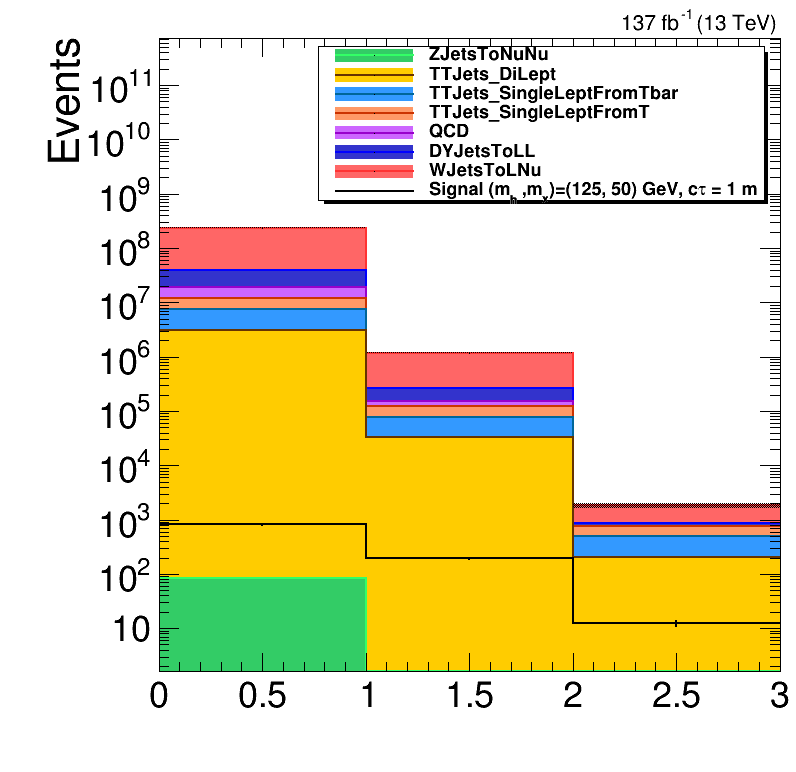

In [12]:
# loop over all the cuts and save the efficiency for each cut and a list for cuts
plotting = True

br = 0.2
#bkg > 3
# time_cuts = [0.2589177693258852] 
# gamma_cuts = [0.8056595195185249] 
# mindeltaR_cuts = [0.2533894061881849] 
#last week
# time_cuts = [0.22] 
# gamma_cuts = [0.56] 
# mindeltaR_cuts = [0.90] 

#signal>5
time_cuts = [0.4] 
gamma_cuts = [0.08428431211810679] 
mindeltaR_cuts = [0.22405731077115335]
siget_cuts = [1.5347842282914728]
# time_cuts = [0.4513939923657093] 
# gamma_cuts = [0.48875550010470364] 
# mindeltaR_cuts = [0.22136155458230036]
# 'time': 0.7159056579749841, 'tmf': 0.004853714421965361, 'jetMinDeltaRPVTracks': 0.8535093081841265}
nTags = {}
nJets = {}
start_t = time.time()
for siget_cut in siget_cuts:
    for gamma_cut in gamma_cuts: #loop over the three variables
        for time_cut in time_cuts:
            for mindeltaR_cut in mindeltaR_cuts:
                #go through each sample
    #         
                for k,T in jetGammaMax.items():


                    start_t = time.time()
                    tagged_jet = np.logical_and(jetGammaMax[k]<gamma_cut,jetMinDeltaRPVTracks[k]>mindeltaR_cut)
                    tagged_jet = np.logical_and(tagged_jet,jetTime[k]>time_cut)
                    tagged_jet = np.logical_and(tagged_jet,sig_et[k]<siget_cut)


    #                 tagged_jet = np.logical_and(tagged_jet,np.abs(jetEta[k])<1.48)
                    nTags[k] = jetPt[k][tagged_jet].count()
                    for i,ele in enumerate(nTags[k]):
                        if ele > 2:
                            nTags[k][i] = 2
                if plotting:
                      # Plotting THStack
                    c = rt.TCanvas('c','c', 800, 800)
                    h = {}
                    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
                    leg = rt.TLegend(0.40,0.74,0.96,0.94)

                    leg.SetTextSize(0.025)
                    # leg.SetTextFont(42)
                    leg.SetEntrySeparation(0.01)
                    stack = rt.THStack( "hs" , "Hgg Stack " )
                    total = rt.TH1D('total','total',3,0,3)
                    # color_list = [625,597,876,806,861,393,845]
                    color_list = [845,800,861,806,876,597,625]
                    keys = ['bkg_ZJetsToNuNu','bkg_TTJets_DiLept','bkg_TTJets_SingleLeptFromTbar','bkg_TTJets_SingleLeptFromT','bkg_QCD','bkg_DYJetsToLL','bkg_WJetsToLNu']
                    sig_keys = ['bbbb']
                    # keys = ['WJetsToLNu','WJetsToLNu_old']
                    bkg_integral = 0.0
                    max_value = 0
                    i=0
                    for k in keys:
                        if k == 'bkg_WJetsToLNu' or True:
                            v = nTags[k]
                            v = v
                            w = weight[k] +  v * 0.0
                            v = v.flatten()
                            w = w.flatten()
                            v = v[w<8000000]
                            cond = v==2

    #                         print(k,  runNum[k][w<8000000][cond],lumiSec[k][w<8000000][cond],evtNum[k][w<8000000][cond],w[w<8000000][cond])

                            w = w[w<8000000]

                            h[k] = create_TH1D( v, axis_title=['Tagged delayed jets', 'Events'], name=k, binning=[3,0,3],weights = w)
                            h[k].Sumw2()
                            total.Add(h[k])
                            stack.Add( h[k])
                            h[k].SetLineColor(color_list[i]+3)
                            h[k].SetFillColor(color_list[i])
                            leg.AddEntry(h[k],legend[k])
                            max_value += h[k].GetBinContent(h[k].GetMaximumBin())
                            bkg_integral += h[k].Integral()
                            print(k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

                            i+=1
                    stack.Draw('hist')
    #                 stack.GetYaxis().SetLabelSize(0.)
                    stack.SetMaximum(max_value*1000)
                    stack.SetMinimum(10)
                    stack.GetYaxis().SetTitle("Events")
                    stack.GetXaxis().SetTitle('Number of tagged jets')


    #                 axis = rt.TGaxis( -5, 20, -5, 220, 20,220,510,"");
    #                 axis.SetLabelFont(43);
    #                 axis.SetLabelSize(15);
#                     axis.Draw();
                    i=0
                    for k in sig_keys:
                        v = nTags[k]
                #         v = v[weight[k]<8000000]
                #         w = weight[k][weight[k]<8000000] +  v * 0.0
                        v = v
                        w = weight[k] +  v * 0.0
                        v = v.flatten()
                        w = w.flatten()
                        v = v[w<8000000]
                        cond = v==2
    #                     print(k,  runNum[k][w<8000000][cond],lumiSec[k][w<8000000][cond],evtNum[k][w<8000000][cond],w[w<8000000][cond])

                        w = w[w<8000000]
                        factor = bkg_integral/np.sum(w)
    #                     print(k,1.0*np.sum(w[v>50])/np.sum(w))
                        h[k] = create_TH1D( v, axis_title=['Tagged delayed jets', 'Events'], name=k, binning=[3,0,3],weights = br*w)
                        h[k].Sumw2()
                        h[k].SetLineColor(std_color_list[i])
                        h[k].Draw("hist E same")
                        leg.AddEntry(h[k],legend[k])
                        max_value = max(h[k].GetBinContent(h[k].GetMaximumBin()),max_value)
                        print(k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

                        i+=1
                    leg.Draw()
    #                 c.cd()          # Go back to the main canvas before defining pad2
    #                 pad2 = rt.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
    #                 pad2.SetTopMargin(0)
    #                 pad2.SetBottomMargin(0.2)
    #                 pad2.SetGridx() #vertical grid
    #                 pad2.Draw()
    #                 pad2.cd()       # pad2 becomes the current pad
                    purity = 0
    #                 purity_test = 0
                    last = stack.GetStack().Last()
    #                 last.SetMarkerColor(1)
    #                 last.SetFillColor(1)
                    total.SetFillStyle(3001)
                    total.SetLineColor(1)
                    total.SetFillColor(1)
                
                    total.GetYaxis().SetTitleOffset(1.6)
                    total.Draw("same e2")
                    print("total",total.GetBinContent(1),total.GetBinError(1))
                    for i in range(3):#loop over the bins of the stack plot

                        b = last.GetBinContent(i+1)
                        s = h['bbbb'].GetBinContent(i+1)
                        if not s+b ==  0:
                            purity +=2*((s+b)*math.log(s/b+1)-s)
    #                         purity_test += 2*((s+b)*math.log(s/b+1)-s)

                            print(i,s,b,2*((s+b)*math.log(s/b+1)-s),last.GetBinError(i+1),last.GetBinError(i+1)/b)

                    purity = purity **0.5
    #                 purity_test = purity_test**0.5
                    print(gamma_cut,time_cut, mindeltaR_cut, purity)




                    CMS_lumi.lumi_13TeV = "137 fb^{-1}"
                    CMS_lumi.cmsText = ""
                    CMS_lumi.writeExtraText = False
                    CMS_lumi.CMS_lumi(c,4,3)


                    # if setlog: 
                    #     c.SetLogy()
                    c.SetLeftMargin(0.2)
                    c.SetLogy()
                    c.Draw()
    #                 c.SaveAs("../plots/ntags_optimization/mindeltaRcut"+str(mindeltaR_cut)+"_timecut"+str(time_cut)+"gammacut"+str(gamma_cut)+".pdf")

In [11]:
# loop over all the cuts and save the efficiency for each cut and a list for cuts
plotting = True

br = 0.2

cut_variable = 1
# 1 = time,   2= gamma, 3=deltaR
# time_cuts = [0.7244100040294038]
time_cuts = [0.4]
gamma_cuts = [0.08428431211810679]
mindeltaR_cuts = [0.22405731077115335 ]
siget_cuts = [1.5347842282914728]
if cut_variable == 1:#time
#     time_cuts =  list(np.array(range(16))/5.0)+[0.1,0.25,0.3]
    time_cuts = [0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45]
    time_cuts.sort() 
elif cut_variable == 2:#gamma
    gamma_cuts = list(np.array(range(16))/10.0)
elif cut_variable == 3:#deltaR
    mindeltaR_cuts = list(np.array(range(16))/10.0)+ [0.22,0.24]
    mindeltaR_cuts.sort()
else:
    siget_cuts = list(np.array(range(16))/10.0)
    siget_cuts.sort()
time_cuts = np.array(time_cuts)
gamma_cuts = np.array(gamma_cuts)
mindeltaR_cuts = np.array(mindeltaR_cuts)
siget_cuts = np.array(siget_cuts)

    
significance = []
validity = []
nTags = {}
nJets = {}
start_t = time.time()
for siget_cut in siget_cuts:
    for time_cut in time_cuts:
        for gamma_cut in gamma_cuts:
            for mindeltaR_cut in mindeltaR_cuts:
                for k,T in jetGammaMax.items():
                    start_t = time.time()
                    tagged_jet = np.logical_and(jetGammaMax[k]<gamma_cut,jetMinDeltaRPVTracks[k]>mindeltaR_cut)
                    tagged_jet = np.logical_and(tagged_jet,jetTime[k]>time_cut)
                    tagged_jet = np.logical_and(tagged_jet,sig_et[k]<siget_cut)


                    nTags[k] = jetPt[k][tagged_jet].count()
                    for i,ele in enumerate(nTags[k]):
                        if ele > 2:
                            nTags[k][i] = 2


                total = [0.0,0.0,0.0]
                sig = [0.0,0.0,0.0]
                keys = ['bkg_ZJetsToNuNu','bkg_TTJets_DiLept','bkg_TTJets_SingleLeptFromTbar','bkg_TTJets_SingleLeptFromT','bkg_QCD','bkg_DYJetsToLL','bkg_WJetsToLNu']
                sig_keys = ['bbbb']
                for k in keys:
                    v = nTags[k]        
            #         w = weight[k] +  v * 0.0
                    w = weight[k]
                    v = v.flatten()
                    w = w.flatten()
                    v = v[w<8000000]
                    w = w[w<8000000]
                    for i in range(3):
                        total[i] = total[i] + np.sum(w[v==i])

                for k in sig_keys:
                    v = nTags[k]
            #         v = v[weight[k]<8000000]
            #         w = weight[k][weight[k]<8000000] +  v * 0.0
                    v = v
                    w = weight[k] +  v * 0.0
                    v = v.flatten()
                    w = w.flatten()
                    v = v[w<8000000]
                    w = w[w<8000000]
                    for i in range(3):
                        sig[i] += sig[i] + np.sum(w[v==i])*br
                purity = 0
                for i in range(3):#loop over the bins of the stack plot
                    b = total[i]
                    s = sig[i]
                    if s + b > 0:
                        purity +=2*((s+b)*math.log(s/b+1)-s)
            #             print(i,s,b,2*((s+b)*math.log(s/b+1)-s))

                purity = purity **0.5
                print(gamma_cut,time_cut, mindeltaR_cut,siget_cut, purity,sig[-1],sig[-1]>5)
                significance.append(purity)
                validity.append(int(sig[-1]>5))



0.08428431211810679 0.37 0.22405731077115335 1.5347842282914728 0.33366220771861893 12.97450025795115 True
0.08428431211810679 0.38 0.22405731077115335 1.5347842282914728 0.3365155704742921 12.785278145656775 True
0.08428431211810679 0.39 0.22405731077115335 1.5347842282914728 0.3394995112967608 12.596056033362402 True
0.08428431211810679 0.4 0.22405731077115335 1.5347842282914728 0.3486508378406884 12.596056033362402 True
0.08428431211810679 0.41 0.22405731077115335 1.5347842282914728 0.3445293564100395 11.810187599712663 True
0.08428431211810679 0.42 0.22405731077115335 1.5347842282914728 0.33709160083083334 10.915218117679615 True
0.08428431211810679 0.43 0.22405731077115335 1.5347842282914728 0.32849394044073665 10.238450732413185 True
0.08428431211810679 0.44 0.22405731077115335 1.5347842282914728 0.331909315206328 10.04922862011881 True


KeyboardInterrupt: 

137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


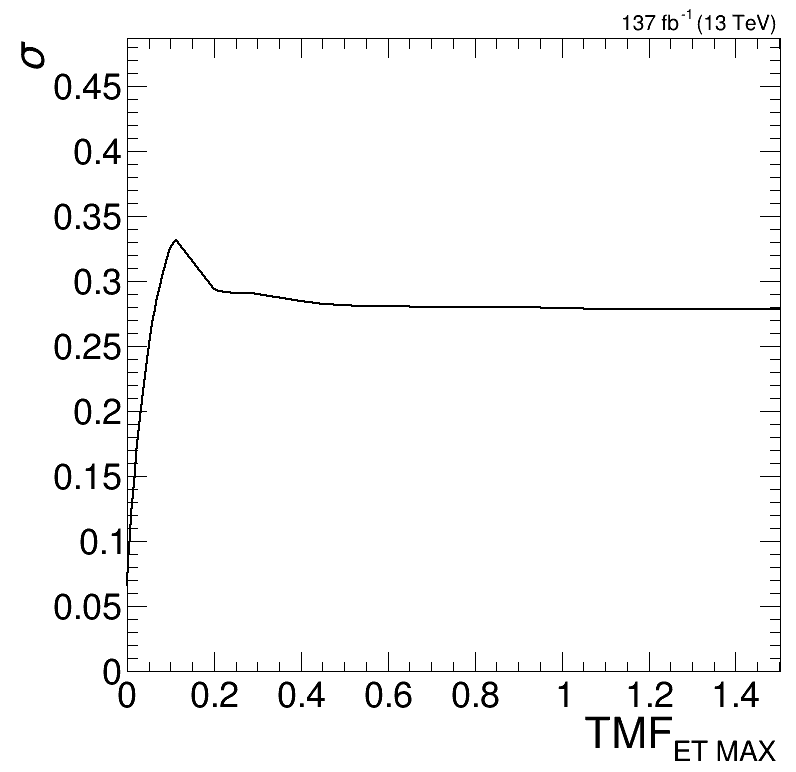

In [10]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.55,0.70,0.90,0.85)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)

gr = {}
time_cuts = np.array(time_cuts)
gamma_cuts = np.array(gamma_cuts)
mindeltaR_cuts = np.array(mindeltaR_cuts)
significance = np.array(significance)

if cut_variable == 1:
    gr['good'] = create_TGraph(time_cuts[validity],significance[validity],axis_title = ['jet time [ns]','\sigma'])
    bad = np.logical_not(validity)
    gr['all'] = create_TGraph(time_cuts,significance,axis_title = ['jet time [ns]','\sigma'])
    x_max = np.max(time_cuts)
elif cut_variable == 2:
    gr['good'] = create_TGraph(gamma_cuts[validity],significance[validity],axis_title = ['TMF_{ET MAX}','\sigma'])
    gr['all'] = create_TGraph(gamma_cuts,significance,axis_title = ['TMF_{ET MAX}','\sigma'])
    x_max = np.max(gamma_cuts)
elif cut_variable == 3:
    gr['good'] = create_TGraph(mindeltaR_cuts[validity],significance[validity],axis_title = ['#Delta R_{min}','\sigma'])
    bad = np.logical_not(validity)
    gr['all'] = create_TGraph(mindeltaR_cuts,significance,axis_title = ['#Delta R_{min}','\sigma'])
    x_max = np.max(mindeltaR_cuts)
    
else:
#     gr['good'] = create_TGraph(mindeltaR_cuts[validity],significance[validity],axis_title = ['#Delta R_{min}','\sigma'])
#     bad = np.logical_not(validity)
    gr['all'] = create_TGraph(siget_cuts,significance,axis_title = ['#sigma_{ET}','\sigma'])
    x_max = np.max(siget_cuts)
    
    
# gr['good'].SetMarkerColor(2)
# gr['good'].SetMarkerSize(1.5)
# gr['good'].SetMarkerStyle(5)
# gr['good'].SetLineWidth(0)
# gr['good'].Draw('ac')
    
gr['all'].SetLineWidth(2)
gr['all'].SetLineColor(1)
gr['all'].GetXaxis().SetRangeUser(0,x_max)
gr['all'].GetYaxis().SetRangeUser(0,1.5*np.max(significance))
# leg.AddEntry(gr['all'],"Has > 5 signal events")
gr['all'].Draw('ac')

    
# gr['good'].SetMarkerColor(2)
# gr['good'].SetMarkerSize(1.5)
# gr['good'].SetMarkerStyle(5)
# gr['good'].SetLineColor(2)
# gr['good'].SetLineWidth(0)
# leg.AddEntry(gr['good'],"Has > 5 signal events")
# gr['good'].Draw('c')
leg.Draw()
    
# gr['bad'].Draw('ac')


# for i,k in enumerate(gr.keys()):
#     gr[k].GetYaxis().SetRangeUser(0,1.5*np.max(significance))
#     gr[k].GetXaxis().SetRangeUser(0,np.max(time_cuts))
#     gr[k].Draw('ac' if i==0 else 'c')




CMS_lumi.lumi_13TeV = "137 fb^{-1}"
CMS_lumi.cmsText = ""
CMS_lumi.writeExtraText = False
CMS_lumi.CMS_lumi(c,4,3)


# if setlog: 
#     c.SetLogy()
# c.SetLeftMargin(0.2)
# c.SetLogy()
c.Draw()
#                 c.SaveAs("../plots/ntags_optimization/mindeltaRcut"+str(mindeltaR_cut)+"_timecut"+str(time_cut)+"gammacut"+str(gamma_cut)+".pdf")

In [ ]:
# gen vs. reco time for matched signals

c = rt.TCanvas('c','c', 900, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.40,0.75,0.95,0.93)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)
max_y = 0
i=0
for k,v in jetMinDeltaRPVTracks.items():
    h[k] = create_TH1D(jetMinDeltaRPVTracks[k].flatten(),axis_title = ['#Delta R_{min}','Events'], binning=[50,0,2])

    currentMax=h[k].GetBinContent(h[k].GetMaximumBin())
    if currentMax > max_y:
        max_y = currentMax
        h[k].SetMaximum(5*currentMax)
        h[k].SetMinimum(1)

    h[k].SetLineColor(std_color_list[i])

    leg.AddEntry(h[k], legend[k])
    h[k].DrawNormalized('same')
    i+=1

    #     c.SetRightMargin(0.17)
leg.Draw()


c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/matched_recotime.png')
#     c.SaveAs('../plots/timing_studies/matched_tresponse_jetpt_'+k+'.png')

 


In [ ]:

keys = ['bbbb']
# keys = ['bkg_WJetsToLNu']

for k in keys:
    c = rt.TCanvas('c','c', 900, 800)
    h = {}
    # leg = rt.TLegend(0.50,0.75,0.97,0.93)
    leg = rt.TLegend(0.60,0.75,0.95,0.93)
    leg.SetTextSize(0.022)
    leg.SetTextFont(42)
    leg.SetEntrySeparation(0.01)
    max_y = 0
#     k = 'bbbb_mh125_ctau1'
    # sel = np.abs(jetEta[k])<2.0
    # sel = np.logical_and(sel,np.abs(jetPt[k])>20)
    # sel = np.logical_and(sel,jetRechitE[k]>10)
#     h[k] = create_TH2D(np.column_stack((genTime[k],jetTime[k])), axis_title = ['Gen Time [ns]','Reco Time [ns]','Events'], binning=[50,-5,20,50,-5,20])
#     h[k] = create_TH2D(np.column_stack((jetGammaMax[k].flatten(),jetMinDeltaRPVTracks[k].flatten())), axis_title = ['TMF','#Delta R_{min}','Events'], binning=[50,0,0.1,50,0,1])
#     h[k] = create_TH2D(np.column_stack((jetTime[k].flatten(),jetMinDeltaRPVTracks[k].flatten())), axis_title = ['jetTime [ns]','#Delta R_{min}','Events'], binning=[50,-10,10,50,0,1])
    h[k] = create_TH2D(np.column_stack((jetTime[k].flatten(),jetGammaMax[k].flatten())), axis_title = ['jetTime [ns]','TMF_{ET max}','Events'], binning=[50,-15,15,50,0,1.5])

    # a = jetGammaMax[k].flatten()[jetMinDeltaRPVTracks[k].flatten()>0.4]
    print(a)
    print(a[a == 0.0])
    #     currentMax=h[k].GetBinContent(h[k].GetMaximumBin())
    #     if currentMax > max_y:
    #         max_y = currentMax
    #         h[k].SetMaximum(10*currentMax)
    #         h[k].SetMinimum(1)


    # leg.AddEntry(h['CHEF'], 'PF Jet CHEF')
    # leg.AddEntry(h['jetGammaMax_ET'], 'PF Jet TMF_{MAX}')
    # leg.AddEntry(h['jetTMF_all'], 'PF Jet TMF_{all tracks}')
    # leg.AddEntry(h['jetTMF_pv'], 'PF Jet TMF_{PV tracks}')
    # for k,v in h.items():
    h[k].Draw('colz')

    c.SetRightMargin(0.17)

    # # leg.Draw()


    c.SetLogz()
    c.Draw()
#     c.SaveAs('../plots/timing_studies/matched_gen_reco_'+k+'.png')
#     c.SaveAs('../plots/timing_studies/matched_tresponse_jetpt_'+k+'.png')